# 주성분 분석(PCA) 개념과 원리 쉽게 이해하기


## 주성분 분석이란?

- `주성분 분석(Principal Component Analysis, PCA)`은 여러 개의 독립변수들을 잘 설명해줄 수 있는 `주된 성분을 추출`하는 기법이다.

- 주성분 분석을 통해 전체 변수들의 핵심 특성만 선별하기 때문에, `독립변수(차원)의 수를 줄일 수 있다`. 이는 흔히 말하는 차원의 저주(Curse of dimensionality)를 방지하기 위한 방법이다.

- 즉, `여러 개의 변수들이 소수의 특정한 변수들로 축약되도록 가공`하는 것이다. 변수의 수를 줄임으로써 모형을 간단하게 만들 수 있고 분석 결과를 보다 효과적으로 해석할 수 있다.

- 주성분 분석을 위해서는 사용되는 변수들이 모두 등간척도나 비율척도로 측정한 양적 변수여야 하고, 관측치들이 서로 독립적이고 정규분포를 이루고 있어야 한다.

## 차원을 감소하는 방법

1. 변수 선택을 통해 `비교적 불필요하거나 유의성이 낮은 변수를 제거`하는 방법.

2. `변수들의 잠재적인 성분을 추출`하여 차원을 줄이는 방법.

    * 주성분 분석(Principal Component Analysis)

    * 공통요인분석(Common Factor Analysis, CFA)

    | `PCA`: 변수의 수를 축약하면서 정보의 손실을 최소화하고자 할 때 사용.

    | `CFA`: 변수들 사이에 존재하는 차원을 규명함으로써 변수들 간의 구조를 파악하는 데 주로 사용.

## 차원의 저주 (Curse of Dimensionality)

- `변수가 늘어남에 따라 차원이 커지면서 예측이 불안정`해지는 문제.

    (ex. 2차원 A4용지 위에 꽉 차도록 구슬을 올려놓을 때와, 3차원 A4용지 상자 안에 구슬을 꽉 채워 넣을 때 필요한 구슬의 차이.)

-  `차원이란 공간 내에 있는 점의 위치를 나타내기 위해 필요한 축의 개수`를 말함. 차원은 데이터셋의 변수와 같은 의미.

    * ex. `SIFT`

    1.  16 * 16 크기의 패치를 16등분하여 4 * 4로 구획을 나눈다.
    
    2. 각 구획은 4 * 4 형태를 가지며 `구획 내부의 16개의 픽셀은 각각 8개의 방향(변수이자 차원)을 가진다`. 이를 이용해 `8 bins를 가진 히스토그램`을 그린다.
    
    3. 각 구획은 8개의 변수를 가지므로 8 차원이며, 이러한 구획이 16개 있으므로 8 * 16 = 128 즉, `하나의 16 * 16 패치에서 그리는 벡터는 128차원`이다. (변수가 128개)

- `변수가 늘어날수록 과적합(Overfitting)의 위험성이 증가`한다.



## PCA 과정

- PCA는 `데이터 공간에 위치하는 점들의 분산을 최대한 보존하는 축`을 통해 차원을 축소하는 것이 핵심 요소이다.

-  처음 가지고 있던 변수의 개수만큼의 새로운 성분 변수가 생성된다.

- 하지만 일반적으로 `전체 변수 설명력이 높은 두 개의 주성분 변수만 선정`하여 총 변수(축이자 차원)의 개수를 줄일 수 있다.

### 예시

 - X1과 X2 두 변수(2차원)에 각각 10개의 데이터가 있다고 가정하자.


* 공분산 행렬은 데이터의 차원 수에 따라 결정된다. 데이터 X는 2차원 데이터이므로, 공분산 행렬은 2×2 행렬이다. $M*M^T$

* 고유값 개수: 2개

* 고유벡터 차원: 2차원

공분산 행렬:
 [[5.78888889 2.54444444]
 [2.54444444 2.9       ]]
고유값:
 [7.2702977  1.41859119]
고유벡터:
 [[ 0.86419996 -0.50314851]
 [ 0.50314851  0.86419996]]


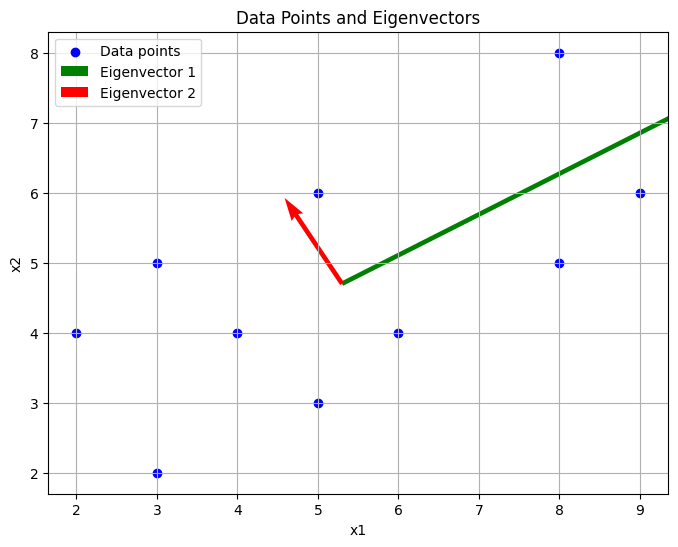

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# 데이터
x1 = np.array([5, 9, 5, 4, 8, 3, 2, 3, 8, 6])
x2 = np.array([6, 6, 3, 4, 8, 2, 4, 5, 5, 4])

# 데이터 결합. 수직으로 쌓은 후 전치
X = np.vstack((x1, x2)).T #X.shape = (10, 2)

# 공분산 행렬 계산
cov_matrix = np.cov(X, rowvar=False)
print("공분산 행렬:\n", cov_matrix)

# 고유값 및 고유벡터 계산
eig_values, eig_vectors = eig(cov_matrix)
print("고유값:\n", eig_values)
print("고유벡터:\n", eig_vectors)

# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, color='blue', label='Data points')
plt.xlabel('x1')
plt.ylabel('x2')

color = ['green', 'red']

# 공분산 행렬의 고유벡터를 플로팅
mean = np.mean(X, axis=0)
length = eig_values

for i in range(len(eig_values)):
    vector = eig_vectors[:, i]

    plt.quiver(mean[0], mean[1], vector[0], vector[1], angles='xy', scale_units='xy', scale=1/length[i], color=color[i], label=f'Eigenvector {i+1}')

plt.title('Data Points and Eigenvectors')
plt.grid(True)
plt.legend()
plt.show()


* `PCA`는 이러한 데이터의 분산을 가장 잘 표현할 수 있는 저차원을 찾아내는 것이다.

    1. 축을 찾아내기 전에 우선 데이터를 표준화.

    2.  그다음 데이터의 분산을 가장 잘 나타낼 수 있는 축을 찾아준다.

    3.  해당 차원의 가장 많은 분산을 담아내는 축이 ‘주성분’이 되는 것이다.


 * `각 포인트들이 고유벡터가 그린 직선과 직각으로 맞닿는 지점의 분포가 가장 넓게 퍼진 축`을 구하는 것이다.

* 피타고라스의 정리에 의해 자연히` 각 포인트와 주성분 축과의 거리 합은 최소`가 된다. (1차 선형 회귀)


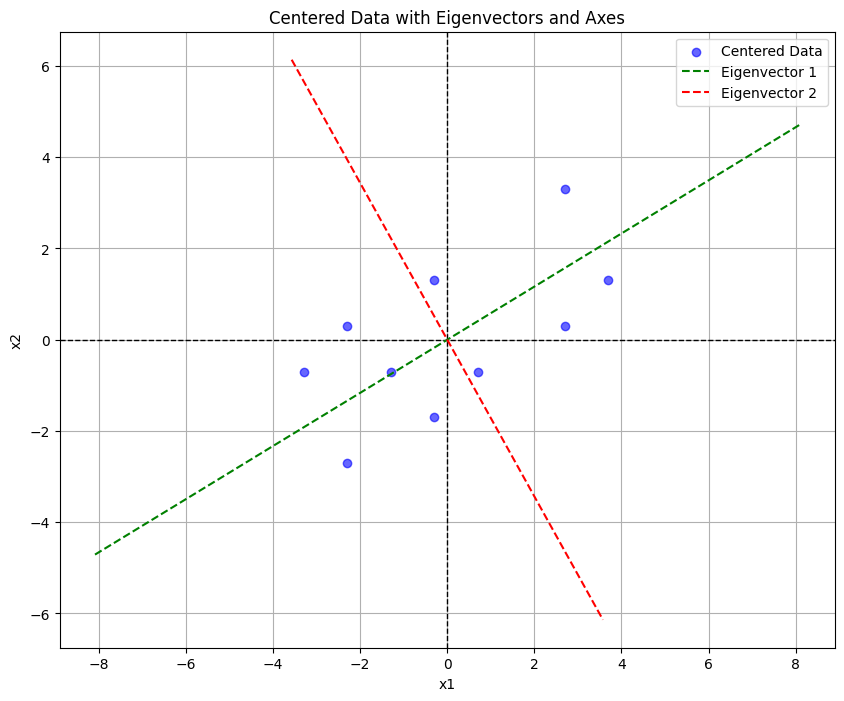

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

# 데이터
x1 = np.array([5, 9, 5, 4, 8, 3, 2, 3, 8, 6])
x2 = np.array([6, 6, 3, 4, 8, 2, 4, 5, 5, 4])

# 데이터 결합
X = np.vstack((x1, x2)).T

# 공분산 행렬 계산
cov_matrix = np.cov(X, rowvar=False)

# 고유값 및 고유벡터 계산
eig_values, eig_vectors = eig(cov_matrix)

# 데이터 평행이동
mean = np.mean(X, axis=0)
X_centered = X - mean

# 시각화
plt.figure(figsize=(10, 8))

# 원본 데이터
plt.scatter(X_centered[:, 0], X_centered[:, 1], color='blue', label='Centered Data', alpha=0.6)

# X축과 Y축을 지나는 수직선
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

color = ['green', 'red']

# 고유벡터 방향으로 수직선 그리기
for i in range(len(eig_values)):
    vector = eig_vectors[:, i]
    length = np.sqrt(eig_values[i]) * 3  # 벡터의 길이를 고유값의 제곱근으로 스케일링
    plt.plot([-length, length], [-length * vector[1] / vector[0], length * vector[1] / vector[0]],
             color[i], linestyle='--', label=f'Eigenvector {i+1}')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Centered Data with Eigenvectors and Axes')
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-35-2682220f2d9f>:42: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(center, width, height, angle, **kwargs)
<ipython-input-35-2682220f2d9f>:42: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ellipse = Ellipse(center, width, height, angle, **kwargs)


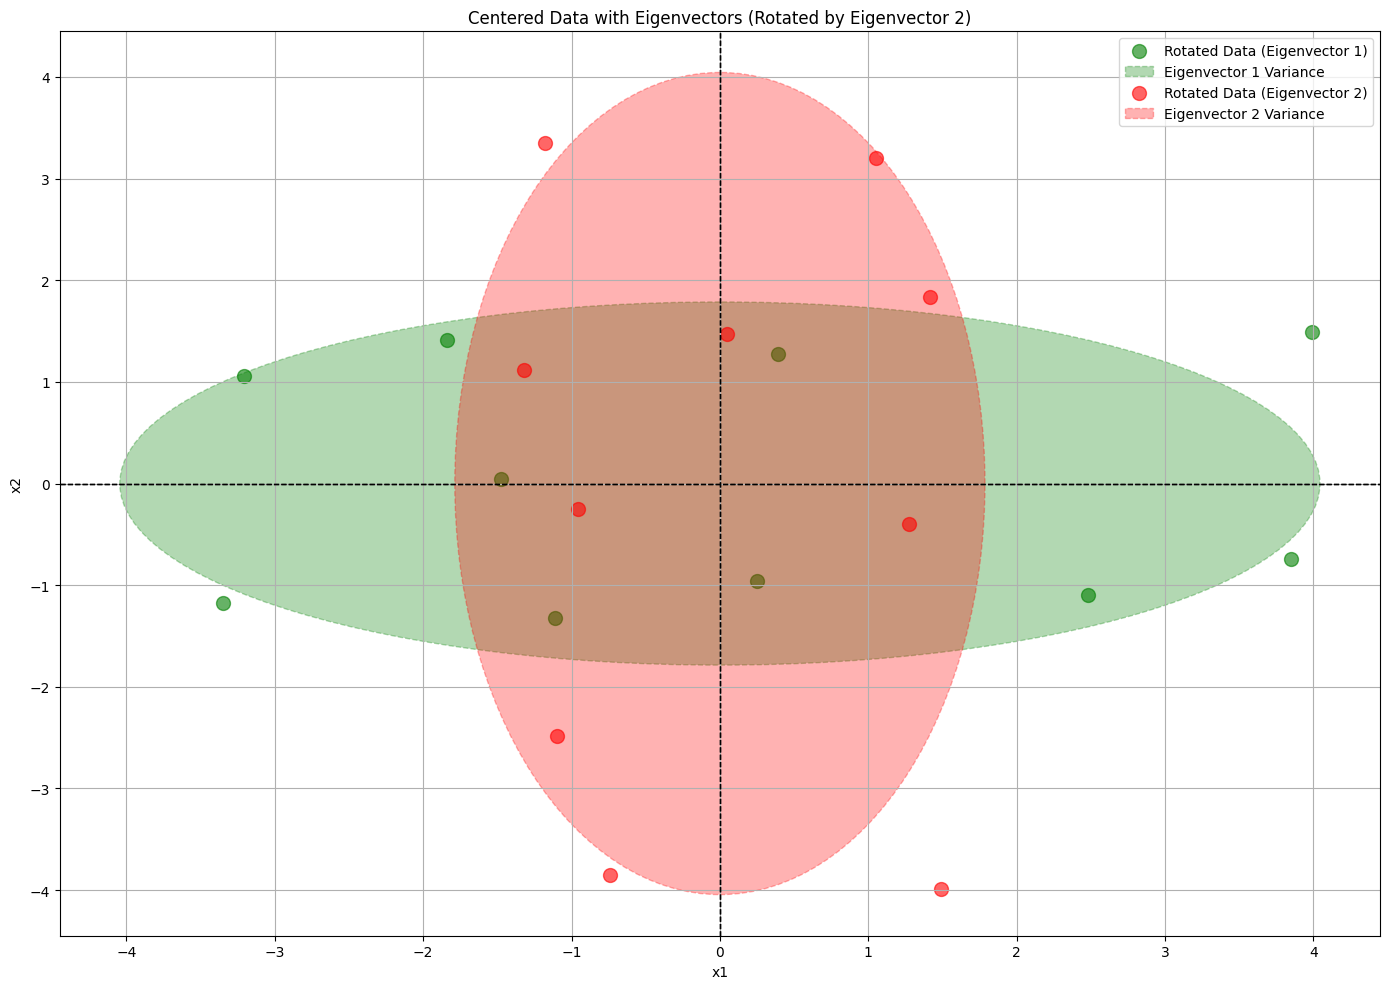

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from matplotlib.patches import Ellipse

# 데이터
x1 = np.array([5, 9, 5, 4, 8, 3, 2, 3, 8, 6])
x2 = np.array([6, 6, 3, 4, 8, 2, 4, 5, 5, 4])

# 데이터 결합
X = np.vstack((x1, x2)).T

# 공분산 행렬 계산
cov_matrix = np.cov(X, rowvar=False)

# 고유값 및 고유벡터 계산
eig_values, eig_vectors = eig(cov_matrix)

# 데이터 평행이동
mean = np.mean(X, axis=0)
X_centered = X - mean

def rotate_data(X, angle):
    """데이터를 주어진 각도만큼 회전시킵니다."""
    theta = np.radians(angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta),  np.cos(theta)]])
    return X @ rotation_matrix.T

def plot_ellipse(ax, center, covariance, n_std=1.5, **kwargs):
    """주어진 중심과 공분산 행렬에 대해 엘립스를 그립니다."""
    # 고유값과 고유벡터 계산
    eigvals, eigvecs = eig(covariance)

    # 고유값의 제곱근을 사용하여 엘립스 반경을 계산
    width, height = 2 * n_std * np.sqrt(eigvals)

    # 엘립스의 방향 설정
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

    # 엘립스 그리기
    ellipse = Ellipse(center, width, height, angle, **kwargs)
    ax.add_patch(ellipse)

# 시각화
fig, ax = plt.subplots(figsize=(14, 10))

color = ['green', 'red']

# 데이터 회전 및 시각화
for i in range(len(eig_values)):
    angle = np.degrees(np.arctan2(eig_vectors[1, i], eig_vectors[0, i]))  # 고유벡터의 각도 계산
    rotated_data = rotate_data(X_centered, -angle)  # 데이터 회전

    ax.scatter(rotated_data[:, 0], rotated_data[:, 1], color=color[i], s=100, label=f'Rotated Data (Eigenvector {i+1})', alpha=0.6)

    plot_ellipse(ax, (0, 0), np.cov(rotated_data, rowvar=False), color=color[i], edgecolor=color[i], linestyle='--', alpha=0.3, label=f'Eigenvector {i+1} Variance')

    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.axvline(0, color='black', linestyle='--', linewidth=1)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(f'Centered Data with Eigenvectors (Rotated by Eigenvector {i+1})')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()
